In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict

# Исходные данные: последовательность рейтингов во времени
ratings = np.array([
    "AAA", "AA", "A", "BBB", "BB", "B", "CCC", "D",  
    "B", "BB", "BBB", "A", "AA", "AAA",
    "A", "BBB", "BB", "B", "CCC", "D",
    "D", "CCC", "B", "BB", "BBB", "A", "AA", "AAA"
])

# Уникальные состояния рейтингов
states = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC", "D"]
state_idx = {s: i for i, s in enumerate(states)}

# Храним количество переходов (S_{t-2}, S_{t-1}) -> S_t
transition_counts = defaultdict(lambda: np.zeros(len(states)))

# Подсчет переходов второго порядка
for t in range(2, len(ratings)):
    prev2, prev1, current = ratings[t-2], ratings[t-1], ratings[t]
    transition_counts[(prev2, prev1)][state_idx[current]] += 1

# Преобразуем в вероятности
transition_matrix_2nd = {}
for (s1, s2), counts in transition_counts.items():
    total = np.sum(counts)
    if total > 0:
        transition_matrix_2nd[(s1, s2)] = counts / total

# Вывод вероятностей
for (s1, s2), probs in transition_matrix_2nd.items():
    print(f"P(S_t | S_t-1={s2}, S_t-2={s1}): {dict(zip(states, probs.round(3)))}")


P(S_t | S_t-1=AA, S_t-2=AAA): {'AAA': 0.0, 'AA': 0.0, 'A': 1.0, 'BBB': 0.0, 'BB': 0.0, 'B': 0.0, 'CCC': 0.0, 'D': 0.0}
P(S_t | S_t-1=A, S_t-2=AA): {'AAA': 0.0, 'AA': 0.0, 'A': 0.0, 'BBB': 1.0, 'BB': 0.0, 'B': 0.0, 'CCC': 0.0, 'D': 0.0}
P(S_t | S_t-1=BBB, S_t-2=A): {'AAA': 0.0, 'AA': 0.0, 'A': 0.0, 'BBB': 0.0, 'BB': 1.0, 'B': 0.0, 'CCC': 0.0, 'D': 0.0}
P(S_t | S_t-1=BB, S_t-2=BBB): {'AAA': 0.0, 'AA': 0.0, 'A': 0.0, 'BBB': 0.0, 'BB': 0.0, 'B': 1.0, 'CCC': 0.0, 'D': 0.0}
P(S_t | S_t-1=B, S_t-2=BB): {'AAA': 0.0, 'AA': 0.0, 'A': 0.0, 'BBB': 0.0, 'BB': 0.0, 'B': 0.0, 'CCC': 1.0, 'D': 0.0}
P(S_t | S_t-1=CCC, S_t-2=B): {'AAA': 0.0, 'AA': 0.0, 'A': 0.0, 'BBB': 0.0, 'BB': 0.0, 'B': 0.0, 'CCC': 0.0, 'D': 1.0}
P(S_t | S_t-1=D, S_t-2=CCC): {'AAA': 0.0, 'AA': 0.0, 'A': 0.0, 'BBB': 0.0, 'BB': 0.0, 'B': 0.5, 'CCC': 0.0, 'D': 0.5}
P(S_t | S_t-1=B, S_t-2=D): {'AAA': 0.0, 'AA': 0.0, 'A': 0.0, 'BBB': 0.0, 'BB': 1.0, 'B': 0.0, 'CCC': 0.0, 'D': 0.0}
P(S_t | S_t-1=BB, S_t-2=B): {'AAA': 0.0, 'AA': 0.0, 'A': 0

/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_7037/3798202979.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transition_df.loc[(s1, s2)] = probs
/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_7037/3798202979.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transition_df.loc[(s1, s2)] = probs


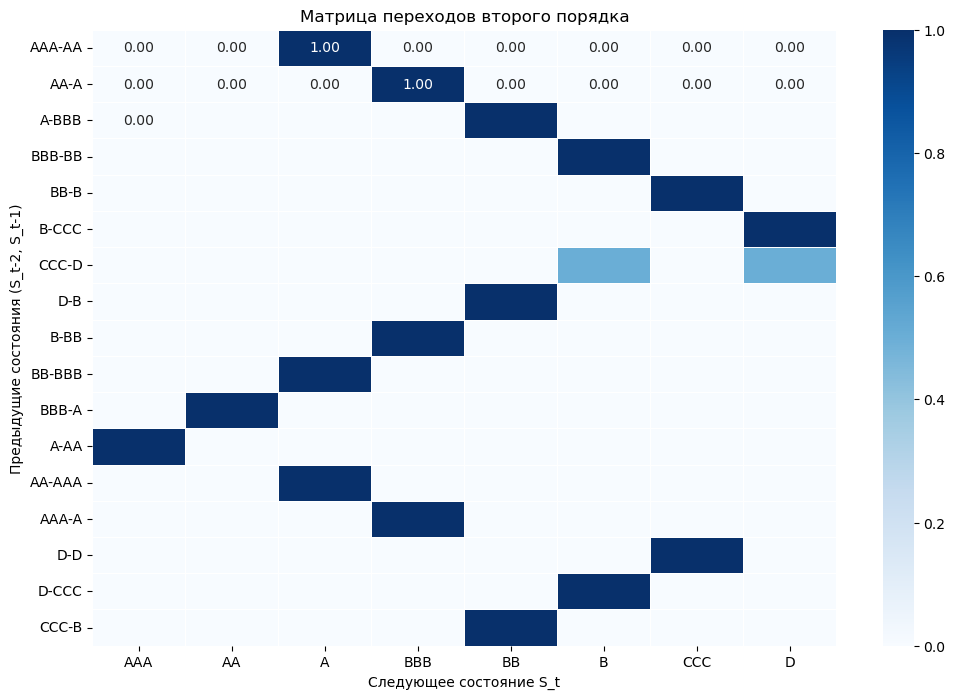

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем датафрейм для удобства визуализации
transition_df = pd.DataFrame(0, index=pd.MultiIndex.from_tuples(transition_matrix_2nd.keys()), columns=states)

for (s1, s2), probs in transition_matrix_2nd.items():
    transition_df.loc[(s1, s2)] = probs

plt.figure(figsize=(12, 8))
sns.heatmap(transition_df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.xlabel("Следующее состояние S_t")
plt.ylabel("Предыдущие состояния (S_t-2, S_t-1)")
plt.title("Матрица переходов второго порядка")
plt.show()

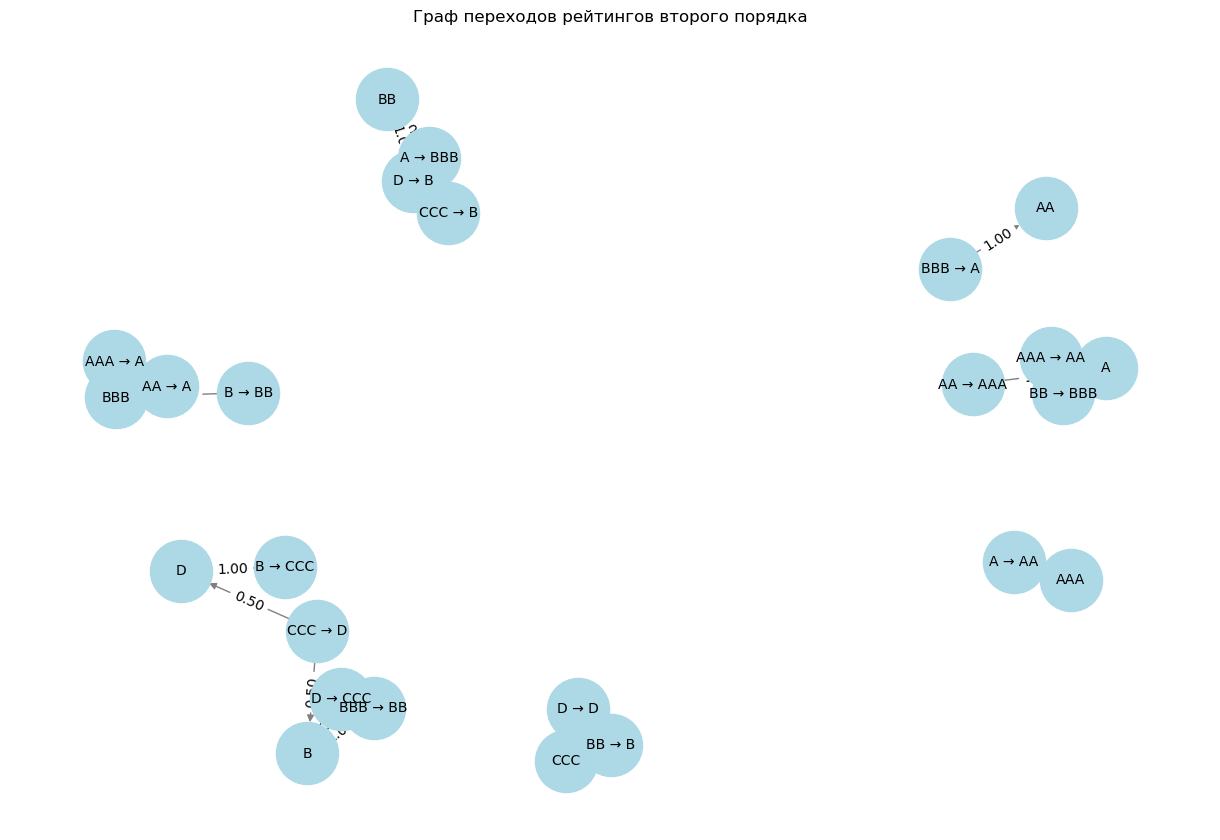

In [5]:
import networkx as nx

# Создаем граф
G = nx.DiGraph()

# Добавляем вершины и рёбра
for (s1, s2), probs in transition_matrix_2nd.items():
    for state, prob in zip(states, probs):
        if prob > 0:  # Добавляем только значимые переходы
            G.add_edge(f"{s1} → {s2}", state, weight=prob)

# Рисуем граф
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Расположение узлов
edges = G.edges(data=True)

# Рисуем узлы и рёбра
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Граф переходов рейтингов второго порядка")
plt.show()

/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_7037/29880653.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transition_df.loc[(s1, s2)] = probs
/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_7037/29880653.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transition_df.loc[(s1, s2)] = probs


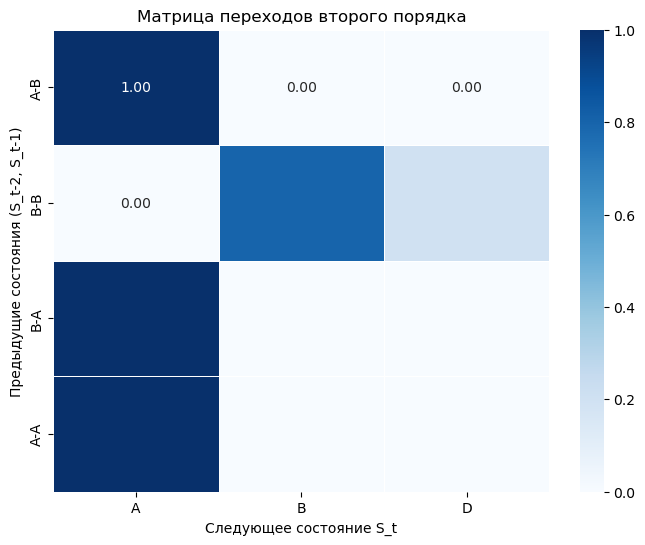

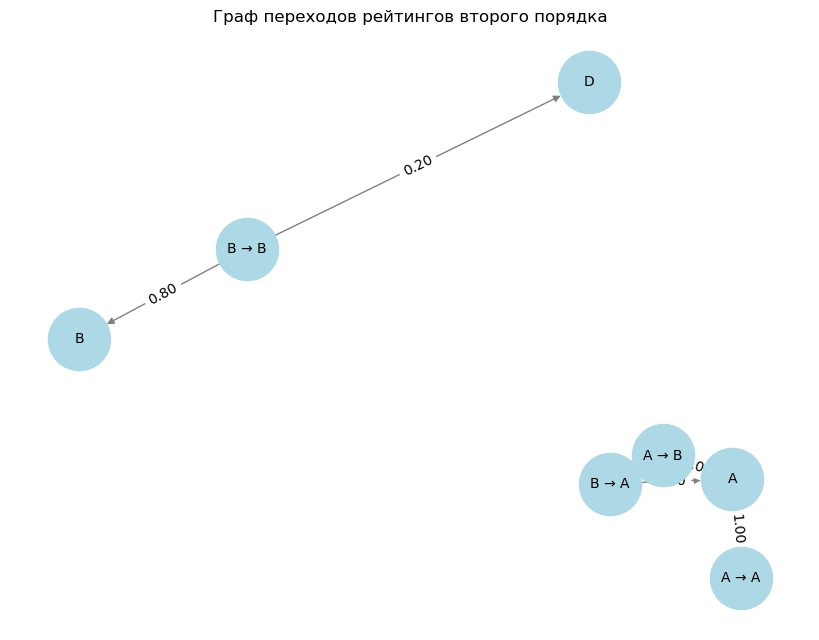

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

# Определяем состояния рейтингов
states = ["A", "B", "D"]
state_idx = {s: i for i, s in enumerate(states)}

# Исторические данные по изменениям рейтингов
ratings = [
    ["A"] * 10 + ["B"] * 10,  # Начальное состояние (t=0)
    ["B"] * 10 + ["B"] * 10,  # t=1: все A → B
    ["A"] * 10 + ["B"] * 10,  # t=2: часть B → A, часть остаётся в B
    ["A"] * 10 + ["B"] * 10,  # t=3
    ["A"] * 10 + ["B"] * 10,  # t=4
    ["A"] * 10 + ["B"] * 10,  # t=5
    ["A"] * 10 + ["D"] * 10   # t=6: все B → D
]

# Подсчёт частот переходов (S_{t-2}, S_{t-1}) → S_t
transition_counts = defaultdict(lambda: np.zeros(len(states)))

for t in range(2, len(ratings)):
    prev2, prev1 = ratings[t-2], ratings[t-1]
    current = ratings[t]
    
    for i in range(len(prev1)):  # Проходим по всем компаниям
        transition_counts[(prev2[i], prev1[i])][state_idx[current[i]]] += 1

# Преобразуем частоты в вероятности
transition_matrix_2nd = {}
for (s1, s2), counts in transition_counts.items():
    total = np.sum(counts)
    if total > 0:
        transition_matrix_2nd[(s1, s2)] = counts / total

# Визуализация Heatmap
transition_df = pd.DataFrame(0, index=pd.MultiIndex.from_tuples(transition_matrix_2nd.keys()), columns=states)

for (s1, s2), probs in transition_matrix_2nd.items():
    transition_df.loc[(s1, s2)] = probs

plt.figure(figsize=(8, 6))
sns.heatmap(transition_df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.xlabel("Следующее состояние S_t")
plt.ylabel("Предыдущие состояния (S_t-2, S_t-1)")
plt.title("Матрица переходов второго порядка")
plt.show()

# Визуализация Графа
G = nx.DiGraph()
for (s1, s2), probs in transition_matrix_2nd.items():
    for state, prob in zip(states, probs):
        if prob > 0:  # Добавляем только значимые переходы
            G.add_edge(f"{s1} → {s2}", state, weight=prob)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Расположение узлов
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Граф переходов рейтингов второго порядка")
plt.show()


Примеры переходов второго порядка:
(1.0, 1.0) -> {1.0: 1.0}


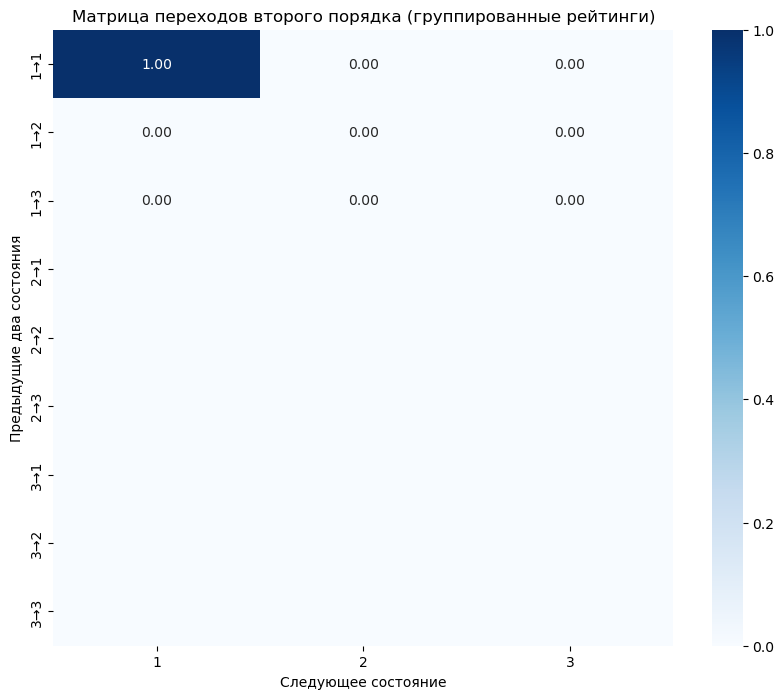

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

# 1. Загружаем данные из файла
file_path = "data/ratings_data_from_bookj.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# 2. Предобработка: очистка рейтингов
# Предполагаем, что рейтинговая информация в столбце "Rating" имеет формат типа "AAA-AA"
def clean_rating(rating):
    return rating.split("-")[0] if isinstance(rating, str) else rating

df["Rating_clean"] = df["Rating"].apply(clean_rating)

# 3. Приводим рейтинги к группам согласно мэпперу:
# Группа 1: 'AAA' и 'AA'  → 1
# Группа 2: 'A' и 'BBB'   → 2
# Группа 3: 'D'           → 3
mapper = {'AAA-AA': 1, 'A-BBB': 2, 'D': 3}
# Для группировки мы будем заменять "AAA" и "AA" на AAA-AA", "A" и "BBB" на ""A-BBB"
df["Rating_group"] = df["Rating"].map(mapper)

# Удаляем строки с пропущенными значениями (если вдруг остались рейтинги, не попавшие в мэппер)
df = df.dropna(subset=["Rating_group"])

# 4. Сортируем данные по компании и дате
df = df.sort_values(by=["Company", "Date"])

# 5. Собираем переходы второго порядка для каждой компании
# Для каждого объекта (компании) собираем последовательность рейтингов и формируем тройки (S_{t-2}, S_{t-1}, S_t)
transitions_grouped = {}  # словарь, где ключ: пара (S_{t-2}, S_{t-1}), значение: список последующих состояний

for company, group in df.groupby("Company"):
    ratings_seq = group["Rating_group"].values
    if len(ratings_seq) < 3:
        continue  # для объекта недостаточно данных
    for i in range(len(ratings_seq) - 2):
        prev1, prev2, current = ratings_seq[i], ratings_seq[i+1], ratings_seq[i+2]
        key = (prev1, prev2)
        if key not in transitions_grouped:
            transitions_grouped[key] = []
        transitions_grouped[key].append(current)

# 6. Формируем вероятностную матрицу переходов второго порядка
# Для каждой пары (S_{t-2}, S_{t-1}) подсчитываем относительные частоты перехода в S_t
transition_matrix_grouped = {}
for key, next_states in transitions_grouped.items():
    unique, counts = np.unique(next_states, return_counts=True)
    probs = counts / counts.sum()
    transition_matrix_grouped[key] = dict(zip(unique, probs))

# Для наглядности выводим несколько примеров
print("Примеры переходов второго порядка:")
for k, v in list(transition_matrix_grouped.items())[:5]:
    print(f"{k} -> {v}")

# 7. Визуализируем полученную матрицу в виде heatmap
# Определяем набор всех возможных состояний после группировки
grouped_states = sorted(set(mapper.values()))  # должно быть [1, 2, 3]

# Создаем полный список пар предыдущих состояний: (s1, s2)
pairs_grouped = [(s1, s2) for s1 in grouped_states for s2 in grouped_states]

# Инициализируем матрицу (размер: (кол-во пар) x (кол-во состояний))
mat = np.zeros((len(pairs_grouped), len(grouped_states)))

# Заполняем матрицу переходов, если для данной пары (s1, s2) есть данные
state_index = {state: i for i, state in enumerate(grouped_states)}
for i, (s1, s2) in enumerate(pairs_grouped):
    if (s1, s2) in transition_matrix_grouped:
        for next_state, prob in transition_matrix_grouped[(s1, s2)].items():
            mat[i, state_index[next_state]] = prob

plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=grouped_states, 
            yticklabels=[f"{a}→{b}" for a, b in pairs_grouped])
plt.xlabel("Следующее состояние")
plt.ylabel("Предыдущие два состояния")
plt.title("Матрица переходов второго порядка (группированные рейтинги)")
plt.show()


In [13]:
def build_transition_pairs(ratings):
    """
    Принимает список рейтингов и возвращает словарь переходов второго порядка.
    Ключ словаря — пара (S_t-2, S_t-1),
    Значение — список рейтингов, в которые произошёл переход (S_t) после данной пары.
    """
    transitions = {}
    # Идем по списку, начиная с индекса 2, чтобы можно было взять два предыдущих значения
    for i in range(2, len(ratings)):
        prev_pair = (ratings[i-2], ratings[i-1])
        current_rating = ratings[i]
        
        # Если такая пара уже встречалась, добавляем текущий рейтинг в список переходов
        if prev_pair in transitions:
            transitions[prev_pair].append(current_rating)
        else:
            transitions[prev_pair] = [current_rating]
    
    return transitions

# Пример использования:
ratings = [1, 1, 2, 2, 3, 1, 2, 3]  # Здесь 1 - AAA-AA, 2 - A-BBB, 3 - D
transition_pairs = build_transition_pairs(ratings)
print("Переходы второго порядка:")
for pair, next_ratings in transition_pairs.items():
    print(f"{pair} -> {next_ratings}")

Переходы второго порядка:
(1, 1) -> [2]
(1, 2) -> [2, 3]
(2, 2) -> [3]
(2, 3) -> [1]
(3, 1) -> [2]


In [19]:
def create_transition_pairs(ratings):
    """Создает пары из последовательных элементов и добавляет следующий элемент как переход."""
    pairs = []
    for i in range(len(ratings) - 2):  # Останавливаемся за 2 элемента до конца
        current_pair = (ratings[i], ratings[i + 1])  # Текущая пара
        transition = ratings[i + 2]                  # Элемент перехода
        pairs.append((current_pair, transition))     # Добавляем пару и переход
    return pairs

# Примеры использования
test_cases = [
    [1, 2, 3, 4, 5],    # (1,2)->3, (2,3)->4, (3,4)->5
    [1, 2, 3],           # (1,2)->3
    [10, 20, 30, 40],    # (10,20)->30, (20,30)->40
    [7, 8, 12, 32, 4],                 # []
    []                   # []
]

for data in test_cases:
    result = create_transition_pairs(data)
    print(f"Вход: {data} → Результат: {result}")

Вход: [1, 2, 3, 4, 5] → Результат: [((1, 2), 3), ((2, 3), 4), ((3, 4), 5)]
Вход: [1, 2, 3] → Результат: [((1, 2), 3)]
Вход: [10, 20, 30, 40] → Результат: [((10, 20), 30), ((20, 30), 40)]
Вход: [7, 8, 12, 32, 4] → Результат: [((7, 8), 12), ((8, 12), 32), ((12, 32), 4)]
Вход: [] → Результат: []


In [23]:
from collections import defaultdict
import numpy as np

def create_transition_matrix(ratings_list):
    """Создает матрицу переходов второго порядка из списка рейтингов разных объектов."""
    transitions = defaultdict(list)

    # Формируем пары (S_{t-2}, S_{t-1}) -> S_t
    for ratings in ratings_list:
        for i in range(len(ratings) - 2):
            pair = (ratings[i], ratings[i + 1])
            next_state = ratings[i + 2]
            transitions[pair].append(next_state)

    # Вычисляем вероятности
    transition_probs = {}
    for pair, next_states in transitions.items():
        unique, counts = np.unique(next_states, return_counts=True)
        total = counts.sum()
        probabilities = {state: count / total for state, count in zip(unique, counts)}
        transition_probs[pair] = probabilities

    return transition_probs

# Пример с несколькими объектами
ratings_data = [
    ['AAA', 'AA', 'A', 'A', 'B'],  # (1,2)→3, (2,3)→4, (3,4)→5
    [1, 2, 3, 2, 3, 4],  # (1,2)→3, (2,3)→2 и (2,3)→4
    [3, 1, 2, 3],  # (3,1)→2, (1,2)→3
]

transition_probs = create_transition_matrix(ratings_data)

# Вывод результатов
for pair, probs in transition_probs.items():
    print(f"Пара {pair} → {probs}")


Пара ('AAA', 'AA') → {'A': 1.0}
Пара ('AA', 'A') → {'A': 1.0}
Пара ('A', 'A') → {'B': 1.0}
Пара (1, 2) → {3: 1.0}
Пара (2, 3) → {2: 0.5, 4: 0.5}
Пара (3, 2) → {3: 1.0}
Пара (3, 1) → {2: 1.0}
